<a href="https://colab.research.google.com/github/ArthurAJO/aerospace_engineering_ai_activities/blob/main/secondList/Function_Approximation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Arthur Augusto J de Oliveira\
Matrícula: 2016021645

**Link do notebook deste Google Colab: https://colab.research.google.com/drive/13PH7yPRQ3BuRWBaqWcWdyT5wbaHsplXd#scrollTo=TV6ddBVZ0_Kc**

## 3. Aproximação de funções

Com o intuito de observar a capacidade do MLP de aproximar qualquer
função contínua, será realizada a regressão de um intervalo da função seno
cardinal (sinc(x)) com backpropagation. A função de ativação da camada
de saída deve ser linear, e o número de neurônios na camada escondida deve
ser modificado com o intuito de se encontrar a melhor aproximação para a
função.
Devem ser realizadas duas execuções do modelo, sendo uma com um
número de amostras de treinamento igual a 45 e a outra 200, sendo x
amostrado entre −2π e 2π. O valor da função sinc(x) deve ser acrescido
a um ruído uniforme, amostrado no intervalo [−0.1, 0.1]. O conjunto de teste
deve ser composto de valores de x entre [−2π, 2π], obtidos com passo δ = 0.01
e y = sinc(x), sendo:

sinc(x) = sin(x)/x

Para cada execução do modelo, modificando-se os dados de treinamento,
deve ser calculado o erro quadrático médio (MSE) e um gráfico comparando
a saída da funação aproximada e os valores esperados de y.

## Inicialização

Imports e comunicação com o repositório do GitHub que contém o banco de dados para os programas.

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

!git clone https://github.com/ArthurAJO/aerospace_engineering_ai_activities.git

fatal: destination path 'aerospace_engineering_ai_activities' already exists and is not an empty directory.


# Perceptron de múltiplas camadas - MLP (MultiLayer Perceptron)

Abaixo são construídas as funções para a execução da arquitetura de rede Perceptron de múltiplas camadas - MLP (MultiLayer Perceptron).

In [62]:
def activation_y(u):
    return np.tanh(u)

def derivActivation_y(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def derivActivation_h(u):
    return (((2/(np.exp(u) + np.exp(-u)))*(2/(np.exp(u) + np.exp(-u)))))

def activation_h(u):
    return np.tanh(u)

def trainMLP(x, y, p, eta, tol, maxEpocas):
    m = y.shape[1]
    n = np.shape(x)[1] 
    N = np.shape(x)[0]
    z = np.matrix(np.random.rand(n+1,p)-0.5)
    w = np.matrix(np.random.rand(p+1,m)-0.5)
    
    xAtual = np.zeros((1, n+1))
    nEpocas = 0
    erroEpoca = tol+1
    evec = [[0]]

    while erroEpoca > tol and nEpocas < maxEpocas - 1:
        ei2 = 0
        xseq = np.arange(N)

        for i in range(N):
            irand = xseq[i]
            xAtual[0,:-1] = x[irand]
            xAtual[0,-1] = 1
            yAtual = y[irand]

            U = np.array(np.dot(xAtual,z), ndmin = 2)
            h_i = activation_h(U)
            hBias = np.append(h_i,[[1]],axis=1)

            yhat_i = np.array(np.dot(hBias, w), ndmin=2)
            yhatClass_i = activation_y(yhat_i)

            e_i = yAtual - yhatClass_i
            flinhaO = derivActivation_y(yhat_i)
            dO= e_i*flinhaO

            wMinus = w[:-1, :]
            eHidden = np.dot(dO, wMinus.T)
            flinhaU = derivActivation_h(U)
            dU = np.multiply(eHidden, flinhaU)

            w = w +eta*np.dot(hBias.T, dO)
            z = z +eta*np.dot(xAtual.T, dU)
            ei2 = ei2 + np.dot(e_i, e_i.T)

        if nEpocas == 0: evec[0] = np.squeeze(ei2/N)
        nEpocas += 1
        evec = np.append(evec, np.squeeze(ei2/N))
        erroEpoca = evec[nEpocas]

    return w, z, evec
    
def yMLP(x, z, w):
  x = np.append(x, np.ones((x.shape[0],1)), axis = 1)
  h_hat = activation_h(np.dot(x,z))
  h_bias = np.append(h_hat, np.ones((h_hat.shape[0], 1)), axis = 1)
  output = np.dot(h_bias, w)
  yEval = activation_y(output)
  
  return yEval

def errorCalc(yEval, actualClass):
    error = np.multiply(actualClass != yEval, 1)
    meanError = np.mean(error)
    stdError = np.std(error)
    accuracy = 1 - meanError
    errorTest = np.dot(error, error.T)
    errorTest_MS = np.mean(errorTest)

    return accuracy, stdError, errorTest_MS

def scoreCalc(yEval, yReal):
    yEval = np.array(yEval, ndmin = 2).T
    error = yReal - yEval
    MSE = np.dot(error.T, error)/yEval.shape[0]

    return MSE

#Resolução do problema

##Dados para a construção da função do problema

Função do problema.

In [63]:
def f_x(x_in):
    return (np.sin(x_in)/x_in)

##45 pontos.

Dados de treino baseados na função do problema.

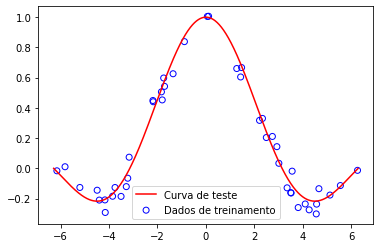

In [64]:
N = 45

xmin = -2*np.pi
xmax =  2*np.pi
x_train = xmin + (xmax - xmin) * np.random.rand(N, 1)
minLimit = -0.1
maxLimit =  0.1
ruido = minLimit + (maxLimit - minLimit) * np.random.rand(N, 1)

y_train = f_x(x_train)
y_train = y_train + ruido
y_train = np.array(y_train, ndmin = 2)

x_test = np.array(np.arange(xmin, xmax, 0.01), ndmin = 2).T
y_test = f_x(x_test)

plt.scatter(x_train, y_train, facecolor = 'none', edgecolor = 'blue')
plt.plot(x_test, y_test, 'r')
plt.legend(['Curva de teste','Dados de treinamento'])
plt.show()

Implementação do MLP.

Número de épocas: 700
Número de neuronios: 11
Erro médio quadrado: 0.0042+-0.0


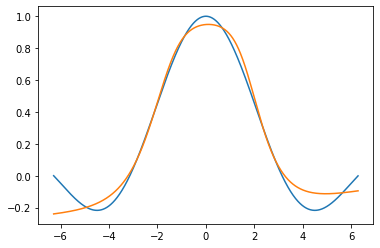

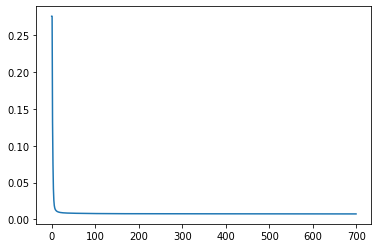

In [65]:
minLimit = -0.1
maxLimit = 0.1
eta = 0.1
maxEpocas = 700
p_in = 11
tol = 1e-5

iterations = 1
yEval = np.zeros((x_test.shape[0], iterations))
mse = np.zeros(iterations)

for i in range(iterations):
    x_train = xmin + (xmax - xmin) * np.random.rand(N, 1)
    ruido = minLimit + (maxLimit - minLimit) * np.random.rand(N, 1)
    y_train = f_x(x_train)
    y_train = y_train + ruido
    y_train = np.array(y_train, ndmin = 2)
    x_test = np.array(np.arange(xmin, xmax, 0.01), ndmin = 2).T
    y_test = f_x(x_test)
    xin = np.array(x_train)
    yin = np.array(y_train)
    wt,zt,erroEpocas = trainMLP(xin, yin, p_in, eta, tol, maxEpocas)
    yEval[:,i] = np.squeeze(yMLP(x_test, zt, wt))
    mse[i] = scoreCalc(yEval[:,i], y_test)

meanScore = np.mean(mse)
stdScore = np.std(mse)
print('Número de épocas: ' + str(maxEpocas))
print('Número de neuronios: ' + str(p_in))
print('Erro médio quadrado: ' + str(np.round(meanScore, 4)) + '+-' + str(np.round(stdScore,4)))

plt.plot(x_test, y_test)
plt.plot(x_test, yEval[:,0])
plt.show()

plt.plot(erroEpocas)
plt.show()

##200 pontos.

Dados de treino baseados na função do problema.

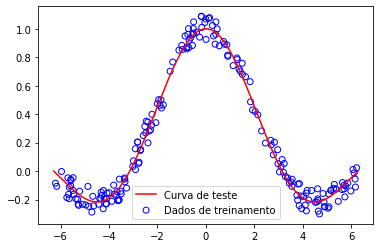

In [66]:
N = 200

xmin = -2*np.pi
xmax =  2*np.pi
x_train = xmin + (xmax - xmin) * np.random.rand(N, 1)
minLimit = -0.1
maxLimit =  0.1
ruido = minLimit + (maxLimit - minLimit) * np.random.rand(N, 1)

y_train = f_x(x_train)
y_train = y_train + ruido
y_train = np.array(y_train, ndmin = 2)

x_test = np.array(np.arange(xmin, xmax, 0.01), ndmin = 2).T
y_test = f_x(x_test)

plt.scatter(x_train, y_train, facecolor = 'none', edgecolor = 'blue')
plt.plot(x_test, y_test, 'r')
plt.legend(['Curva de teste','Dados de treinamento'])
plt.show()

Implementação do MLP.

Número de épocas: 200
Número de neuronios: 5
Erro médio quadrado: 0.0039+-0.0


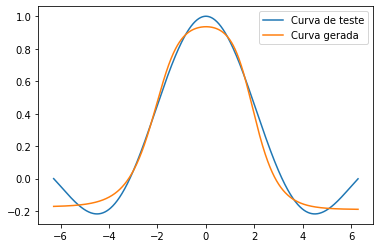

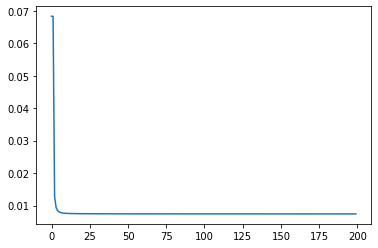

In [67]:
minLimit = -0.1
maxLimit = 0.1
eta = 0.1
maxEpocas = 200
p_in = 5
tol = 1e-5

iterations = 1
yEval = np.zeros((x_test.shape[0], iterations))
mse = np.zeros(iterations)

for i in range(iterations):
    x_train = xmin + (xmax - xmin) * np.random.rand(N, 1)
    ruido = minLimit + (maxLimit - minLimit) * np.random.rand(N, 1)
    y_train = f_x(x_train)
    y_train = y_train + ruido
    y_train = np.array(y_train, ndmin = 2)
    x_test = np.array(np.arange(xmin, xmax, 0.01), ndmin = 2).T
    y_test = f_x(x_test)
    xin = np.array(x_train)
    yin = np.array(y_train)
    wt,zt,erroEpocas = trainMLP(xin, yin, p_in, eta, tol, maxEpocas)
    yEval[:,i] = np.squeeze(yMLP(x_test, zt, wt))
    mse[i] = scoreCalc(yEval[:,i], y_test)

meanScore = np.mean(mse)
stdScore = np.std(mse)
print('Número de épocas: ' + str(maxEpocas))
print('Número de neuronios: ' + str(p_in))
print('Erro médio quadrado: ' + str(np.round(meanScore, 4)) + '+-' + str(np.round(stdScore,4)))

plt.plot(x_test, y_test)
plt.plot(x_test, yEval[:,0])
plt.legend(['Curva de teste','Curva gerada'])
plt.show()

plt.plot(erroEpocas)
plt.show()

##Conclusão

É possível observar como a inserção de mais pontos de treinamento é capaz de aproximar o resultado final da curva com necessidade de menores números de época para uma mesma quantidade de neurônios que o caso de menor quantidade de pontos de treinamento.